<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


from google.colab import files


import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline

# FIRST API

In [ ]:
#say 5 tools such as: 1 reshape, 1 pivot, 1 meld, and 1 stack, and 1 unstack; it depends on the complexity and utility, if its great
#could be 3 tools; if its poor, should be more like 10 tools; can use tool say 2x if needed; don’t forget about APIs, count as a
#tool, too (covered next week)


In [ ]:
#FRED API
#This dataset is from the st Louis FED and shows interest rates charged on credit cards for certain months since 2000
#url: https://fred.stlouisfed.org/series/TERMCBCCALLNS

In [7]:
start = datetime.datetime (2000, 1, 1)
end = datetime.datetime (2021, 1, 1)

Interest = pdr.DataReader('TERMCBCCALLNS', 'fred', start, end)
Interest

,TERMCBCCALLNS
DATE,
2000-01-01,NaN
2000-02-01,15.55
2000-03-01,NaN
2000-04-01,NaN
2000-05-01,15.60
...,...
2020-09-01,NaN
2020-10-01,NaN
2020-11-01,14.65


In [ ]:
#Some months show as NaN since no data was collected, so rows with NaN are dropped using dropna

In [10]:
Interest = Interest.dropna()

In [11]:
Interest


,TERMCBCCALLNS
DATE,
2000-02-01,15.55
2000-05-01,15.60
2000-08-01,15.98
2000-11-01,15.99
2001-02-01,15.63
...,...
2019-11-01,14.87
2020-02-01,15.09
2020-05-01,14.52


<Axes: xlabel='DATE'>

Text(0, 0.5, 'Credit card Interest %')

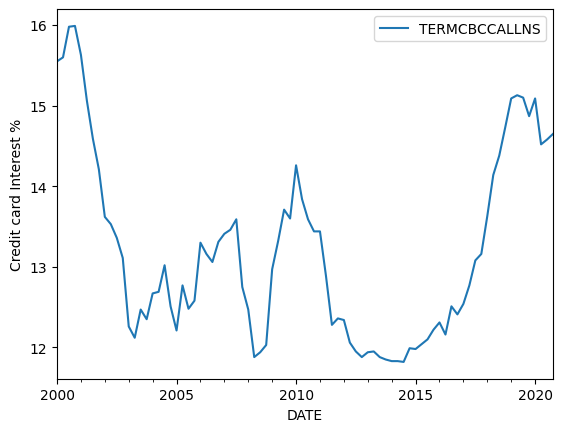

In [14]:
Interest.plot()
# Label y axes
plt.ylabel('Credit card Interest %')
#This shows the credit card interest that was charged each year

In [ ]:
#The cost of credit is important for housing, specifically when it comes to financing and mortgage rates

# SECOND API

In [ ]:
#FRED API
#This dataset is from the st Louis FED and shows Outstanding mortgage debt 1949 - 2019
#url: https://fred.stlouisfed.org/series/MDOAH

In [18]:
start = datetime.datetime (1955, 1, 1)
end = datetime.datetime (2019, 1, 1)

MORTGAGE = pdr.DataReader('MDOAH', 'fred', start, end)
MORTGAGE

,MDOAH
DATE,
1955-01-01,128671.00
1955-04-01,133115.00
1955-07-01,137348.00
1955-10-01,141566.00
1956-01-01,145393.00
...,...
2018-01-01,14979025.26
2018-04-01,15144935.79
2018-07-01,15290110.00


In [16]:
MORTAGE=MORTGAGE.dropna()

In [17]:
MORTGAGE

,MDOAH
DATE,
1950-01-01,NaN
1950-04-01,NaN
1950-07-01,NaN
1950-10-01,82302.00
1951-01-01,NaN
...,...
2018-01-01,14979025.26
2018-04-01,15144935.79
2018-07-01,15290110.00


<Axes: xlabel='DATE'>

Text(0, 0.5, 'Outstanding Mortage Debt')

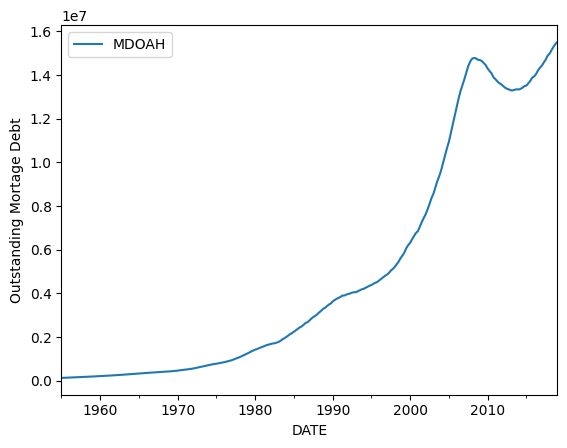

In [20]:
MORTGAGE.plot()
# Label y axes
plt.ylabel('Outstanding Mortage Debt')
#This shows the Outstanding mortgage debt in the US each year

In [ ]:
# Mortgage debt directly correlates with house values, since the higher the price of a home, the more money you will have to borrow
# An interesting part of the graph is the abrupt decline in mortgage debt around 2009, which is when the housing bubble occured
# It seems to have since began to follow the same curve and housing prices nowadays are unreasonably high if you ask me